In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2025-04-04 09:11:56.738388: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 7

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,147 (4.48 KB)

 Trainable params: 1,147 (4.48 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 25s 761ms/step - accuracy: 0.1875 - loss: 1.9127
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2538 - loss: 1.8362 - val_accuracy: 0.2744 - val_loss: 1.6522
Epoch 2/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.2031 - loss: 1.7904
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2785 - loss: 1.6924 - val_accuracy: 0.3516 - val_loss: 1.5313
Epoch 3/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.2734 - loss: 1.6576
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3331 - loss: 1.5718 - val_accuracy: 0.4295 - val_loss: 1.4352
Epoch 4/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.3359 - loss: 1.5361
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3646 - loss: 1.5051 - val_accuracy: 0.4688 - val_loss: 1.3570
Epoch 5/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.4062 - loss: 1.4477
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4049 - loss: 1.4379 - val_accuracy: 0.5614 - val_loss: 1.2871
Epoch 6/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.4766 - loss: 1.3825
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4404 - loss: 1.3802 - val_accuracy: 0.5951 - val_loss: 1.2366
Epoch 7/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4844 - loss: 1.2891
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4601 - loss: 1.3416 - val_accuracy: 0.6126 - val_loss: 1.1724
Epoch 8/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.4922 - loss: 1.2413
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4641 - loss: 1.3096 - val_accuracy: 0.6084 - val_loss: 1.1185
Epoch 9/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.5234 - loss: 1.2578
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5032 - loss: 1.2723 - val_accuracy: 0.6849 - val_loss: 1.0594
Epoch 10/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.5078 - loss: 1.1772
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5093 - loss: 1.2222 - val_accuracy: 0.6940 - val_loss: 1.0165
Epoch 11/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.5000 - loss: 1.2197
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5083 - loss: 1.2129 - val_accuracy: 0.7256 - val_loss: 0.9675
Epoch 12/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.4453 - loss: 1.2796
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5208 - loss: 1.1939 - val_accuracy: 0.7446 - val_loss: 0.9240
Epoch 13/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.5234 - loss: 1.1149
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5408 - loss: 1.1449 - val_accuracy: 0.7537 - val_loss: 0.8881
Epoch 14/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.5391 - loss: 1.0870
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5531 - loss: 1.1326 - val_accuracy: 0.7572 - val_loss: 0.8670
Epoch 15/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.5156 - loss: 1.1856
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5498 - loss: 1.1224 - val_accuracy: 0.7670 - val_loss: 0.8239
Epoch 16/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.5703 - loss: 1.1100
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5686 - loss: 1.0899 - val_accuracy: 0.7754 - val_loss: 0.7973
Epoch 17/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.5312 - loss: 1.0916
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5559 - loss: 1.0897 - val_accuracy: 0.7698 - val_loss: 0.7809
Epoch 18/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6406 - loss: 1.0439
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5894 - loss: 1.0513 - val_accuracy: 0.7853 - val_loss: 0.7445
Epoch 19/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6406 - loss: 0.9623
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5902 - loss: 1.0328 - val_accuracy: 0.7768 - val_loss: 0.7290
Epoch 20/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6719 - loss: 0.9566
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5980 - loss: 1.0225 - val_accuracy: 0.7832 - val_loss: 0.7082
Epoch 21/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.5391 - loss: 1.0853
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6003 - loss: 1.0022 - val_accuracy: 0.7944 - val_loss: 0.6873
Epoch 22/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.5078 - loss: 1.0926
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5932 - loss: 0.9954 - val_accuracy: 0.7937 - val_loss: 0.6785
Epoch 23/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6250 - loss: 1.0256
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6298 - loss: 0.9702 - val_accuracy: 0.7944 - val_loss: 0.6516
Epoch 24/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.6562 - loss: 0.9255
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6061 - loss: 0.9815 - val_accuracy: 0.7958 - val_loss: 0.6475
Epoch 25/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6094 - loss: 0.8881
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6351 - loss: 0.9191 - val_accuracy: 0.7958 - val_loss: 0.6269
Epoch 26/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.5859 - loss: 1.0149
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6167 - loss: 0.9494 - val_accuracy: 0.8056 - val_loss: 0.6141
Epoch 27/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6172 - loss: 0.8790
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6245 - loss: 0.9237 - val_accuracy: 0.8168 - val_loss: 0.5968
Epoch 28/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.5938 - loss: 0.9878
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6182 - loss: 0.9255 - val_accuracy: 0.8196 - val_loss: 0.5847
Epoch 29/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.6016 - loss: 0.9797
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6349 - loss: 0.9324 - val_accuracy: 0.8295 - val_loss: 0.5830
Epoch 30/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.5625 - loss: 1.0508
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6372 - loss: 0.9116 - val_accuracy: 0.8281 - val_loss: 0.5756
Epoch 31/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6016 - loss: 0.9655
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6394 - loss: 0.9025 - val_accuracy: 0.8239 - val_loss: 0.5709
Epoch 32/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7500 - loss: 0.7825
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6628 - loss: 0.8749 - val_accuracy: 0.8421 - val_loss: 0.5479
Epoch 33/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6484 - loss: 0.9446
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6483 - loss: 0.8870 - val_accuracy: 0.8547 - val_loss: 0.5436
Epoch 34/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6328 - loss: 0.9522
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6515 - loss: 0.8869 - val_accuracy: 0.8596 - val_loss: 0.5303
Epoch 35/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6875 - loss: 0.8135
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6754 - loss: 0.8415 - val_accuracy: 0.8526 - val_loss: 0.5226
Epoch 36/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6797 - loss: 0.8365
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6582 - loss: 0.8918 - val_accuracy: 0.8674 - val_loss: 0.5256
Epoch 37/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.6406 - loss: 0.8575
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6741 - loss: 0.8457 - val_accuracy: 0.8660 - val_loss: 0.5098
Epoch 38/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6172 - loss: 0.8318
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6673 - loss: 0.8416 - val_accuracy: 0.8681 - val_loss: 0.5068
Epoch 39/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7344 - loss: 0.7686
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6911 - loss: 0.8289 - val_accuracy: 0.8709 - val_loss: 0.4979
Epoch 40/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6797 - loss: 0.8331
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6776 - loss: 0.8392 - val_accuracy: 0.8800 - val_loss: 0.4923
Epoch 41/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6406 - loss: 0.8470
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6855 - loss: 0.8265 - val_accuracy: 0.8800 - val_loss: 0.4900
Epoch 42/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.6797 - loss: 0.8853
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6830 - loss: 0.8355 - val_accuracy: 0.8793 - val_loss: 0.4751
Epoch 43/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.7500 - loss: 0.7731
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7001 - loss: 0.8045 - val_accuracy: 0.8800 - val_loss: 0.4778
Epoch 44/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7031 - loss: 0.7124
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6881 - loss: 0.8107 - val_accuracy: 0.8919 - val_loss: 0.4594
Epoch 45/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6406 - loss: 0.8570
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6923 - loss: 0.8112 - val_accuracy: 0.8884 - val_loss: 0.4648
Epoch 46/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6406 - loss: 0.9173
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6840 - loss: 0.8161 - val_accuracy: 0.8870 - val_loss: 0.4609
Epoch 47/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6406 - loss: 0.8866
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6865 - loss: 0.8116 - val_accuracy: 0.8891 - val_loss: 0.4548
Epoch 48/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6797 - loss: 0.7028
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6986 - loss: 0.7846 - val_accuracy: 0.8884 - val_loss: 0.4521
Epoch 49/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6953 - loss: 0.7574
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6990 - loss: 0.7914 - val_accuracy: 0.8828 - val_loss: 0.4418
Epoch 50/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6797 - loss: 0.8184
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6928 - loss: 0.8055 - val_accuracy: 0.8961 - val_loss: 0.4410
Epoch 51/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6484 - loss: 0.7729
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6952 - loss: 0.7818 - val_accuracy: 0.8884 - val_loss: 0.4405
Epoch 52/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7344 - loss: 0.7138
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7149 - loss: 0.7731 - val_accuracy: 0.9011 - val_loss: 0.4247
Epoch 53/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7891 - loss: 0.6553
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7301 - loss: 0.7558 - val_accuracy: 0.8975 - val_loss: 0.4246
Epoch 54/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.7109 - loss: 0.6706
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7147 - loss: 0.7694 - val_accuracy: 0.8968 - val_loss: 0.4235
Epoch 55/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7266 - loss: 0.7085
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7049 - loss: 0.7762 - val_accuracy: 0.8863 - val_loss: 0.4221
Epoch 56/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6797 - loss: 0.7456
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7199 - loss: 0.7550 - val_accuracy: 0.8940 - val_loss: 0.4130
Epoch 57/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6562 - loss: 0.8629
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6943 - loss: 0.7918 - val_accuracy: 0.8989 - val_loss: 0.4118
Epoch 58/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7109 - loss: 0.8084
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7250 - loss: 0.7596 - val_accuracy: 0.9032 - val_loss: 0.4023
Epoch 59/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7031 - loss: 0.7302
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7178 - loss: 0.7555 - val_accuracy: 0.8954 - val_loss: 0.4044
Epoch 60/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.7656 - loss: 0.6715
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.7542 - val_accuracy: 0.8996 - val_loss: 0.3987
Epoch 61/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.7031 - loss: 0.7698
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7199 - loss: 0.7657 - val_accuracy: 0.9060 - val_loss: 0.3928
Epoch 62/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7031 - loss: 0.7765
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7211 - loss: 0.7357 - val_accuracy: 0.9011 - val_loss: 0.3887
Epoch 63/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.6875 - loss: 0.8484
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7231 - loss: 0.7425 - val_accuracy: 0.9025 - val_loss: 0.3874
Epoch 64/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6484 - loss: 0.8748
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7046 - loss: 0.7832 - val_accuracy: 0.9130 - val_loss: 0.3823
Epoch 65/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7109 - loss: 0.7887
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7255 - loss: 0.7314 - val_accuracy: 0.9081 - val_loss: 0.3837
Epoch 66/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.6953 - loss: 0.7578
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7344 - loss: 0.7053 - val_accuracy: 0.9081 - val_loss: 0.3792
Epoch 67/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7734 - loss: 0.6999
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7419 - loss: 0.7151 - val_accuracy: 0.9109 - val_loss: 0.3759
Epoch 68/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6719 - loss: 0.7973
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7223 - loss: 0.7406 - val_accuracy: 0.9172 - val_loss: 0.3688
Epoch 69/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.6562 - loss: 0.8253
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7350 - loss: 0.7114 - val_accuracy: 0.9116 - val_loss: 0.3670
Epoch 70/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6641 - loss: 0.8604
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7041 - loss: 0.7573 - val_accuracy: 0.9088 - val_loss: 0.3707
Epoch 71/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.7188 - loss: 0.8304
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7327 - loss: 0.7399 - val_accuracy: 0.9067 - val_loss: 0.3662
Epoch 72/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6875 - loss: 0.7947
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7233 - loss: 0.7318 - val_accuracy: 0.9074 - val_loss: 0.3676
Epoch 73/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7500 - loss: 0.7144
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7571 - loss: 0.6911 - val_accuracy: 0.9102 - val_loss: 0.3649
Epoch 74/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.7734 - loss: 0.5863
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7211 - loss: 0.7114 - val_accuracy: 0.9137 - val_loss: 0.3660
Epoch 75/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7656 - loss: 0.6812
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7182 - loss: 0.7376 - val_accuracy: 0.9116 - val_loss: 0.3597
Epoch 76/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.7266 - loss: 0.6470
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7383 - loss: 0.7053 - val_accuracy: 0.9088 - val_loss: 0.3560
Epoch 77/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.7656 - loss: 0.6091
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7418 - loss: 0.7012 - val_accuracy: 0.9074 - val_loss: 0.3600
Epoch 78/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.7109 - loss: 0.8142
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7383 - loss: 0.7172 - val_accuracy: 0.9130 - val_loss: 0.3527
Epoch 79/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7266 - loss: 0.7408
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7289 - loss: 0.7300 - val_accuracy: 0.9102 - val_loss: 0.3520
Epoch 80/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.7344 - loss: 0.7924
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7242 - loss: 0.7277 - val_accuracy: 0.9179 - val_loss: 0.3479
Epoch 81/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7344 - loss: 0.7012
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7162 - loss: 0.7175 - val_accuracy: 0.9123 - val_loss: 0.3545
Epoch 82/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.7500 - loss: 0.6799
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7255 - loss: 0.7185 - val_accuracy: 0.9081 - val_loss: 0.3505
Epoch 83/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.7812 - loss: 0.6297
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7353 - loss: 0.6990 - val_accuracy: 0.9123 - val_loss: 0.3494
Epoch 84/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.6797 - loss: 0.7666
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7264 - loss: 0.7089 - val_accuracy: 0.9109 - val_loss: 0.3446
Epoch 85/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.7109 - loss: 0.7400
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7225 - loss: 0.7139 - val_accuracy: 0.9081 - val_loss: 0.3523
Epoch 86/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.7812 - loss: 0.6547
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7437 - loss: 0.6796 - val_accuracy: 0.9060 - val_loss: 0.3479
Epoch 87/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.7266 - loss: 0.6754
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7368 - loss: 0.6845 - val_accuracy: 0.9109 - val_loss: 0.3451
Epoch 88/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.7656 - loss: 0.6742
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7378 - loss: 0.6879 - val_accuracy: 0.9123 - val_loss: 0.3414
Epoch 89/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.8203 - loss: 0.5332
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7522 - loss: 0.6759 - val_accuracy: 0.9158 - val_loss: 0.3361
Epoch 90/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.7109 - loss: 0.7337
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7476 - loss: 0.6686 - val_accuracy: 0.9116 - val_loss: 0.3414
Epoch 91/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7109 - loss: 0.7344
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7242 - loss: 0.7147 - val_accuracy: 0.9123 - val_loss: 0.3520
Epoch 92/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.7812 - loss: 0.6464
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7566 - loss: 0.6774 - val_accuracy: 0.9158 - val_loss: 0.3327
Epoch 93/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.7578 - loss: 0.7033
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7362 - loss: 0.7002 - val_accuracy: 0.9172 - val_loss: 0.3326
Epoch 94/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.7734 - loss: 0.6964
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7601 - loss: 0.6678 - val_accuracy: 0.9172 - val_loss: 0.3343
Epoch 95/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.7344 - loss: 0.6540
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7338 - loss: 0.7058 - val_accuracy: 0.9144 - val_loss: 0.3327
Epoch 96/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.6875 - loss: 0.7112
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7353 - loss: 0.6914 - val_accuracy: 0.9130 - val_loss: 0.3356
Epoch 97/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7109 - loss: 0.7421
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7284 - loss: 0.7079 - val_accuracy: 0.9095 - val_loss: 0.3363
Epoch 98/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6797 - loss: 0.7568
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7343 - loss: 0.6786 - val_accuracy: 0.9144 - val_loss: 0.3341
Epoch 99/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.8047 - loss: 0.6570
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7424 - loss: 0.6789 - val_accuracy: 0.9123 - val_loss: 0.3313
Epoch 100/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7422 - loss: 0.6595
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7536 - loss: 0.6523 - val_accuracy: 0.9144 - val_loss: 0.3217
Epoch 101/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7344 - loss: 0.8215
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7520 - loss: 0.6785 - val_accuracy: 0.9193 - val_loss: 0.3197
Epoch 102/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7656 - loss: 0.5776
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7481 - loss: 0.6628 - val_accuracy: 0.9109 - val_loss: 0.3333
Epoch 103/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7812 - loss: 0.6167
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7544 - loss: 0.6597 - val_accuracy: 0.9144 - val_loss: 0.3234
Epoch 104/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7188 - loss: 0.7326
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7433 - loss: 0.6826 - val_accuracy: 0.9144 - val_loss: 0.3246
Epoch 105/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6953 - loss: 0.7463
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7439 - loss: 0.6690 - val_accuracy: 0.9158 - val_loss: 0.3267
Epoch 106/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7734 - loss: 0.6693
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7406 - loss: 0.6817 - val_accuracy: 0.9186 - val_loss: 0.3315
Epoch 107/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7188 - loss: 0.7449
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7542 - loss: 0.6583 - val_accuracy: 0.9137 - val_loss: 0.3246
Epoch 108/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.7891 - loss: 0.6729
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7422 - loss: 0.6875 - val_accuracy: 0.9067 - val_loss: 0.3326
Epoch 109/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.7812 - loss: 0.6308
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7548 - loss: 0.6574 - val_accuracy: 0.9284 - val_loss: 0.3282
Epoch 110/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.7656 - loss: 0.6605
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7393 - loss: 0.6770 - val_accuracy: 0.9116 - val_loss: 0.3198
Epoch 111/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7578 - loss: 0.7357
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7478 - loss: 0.6888 - val_accuracy: 0.9109 - val_loss: 0.3251
Epoch 112/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.7500 - loss: 0.6409
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7450 - loss: 0.6777 - val_accuracy: 0.9396 - val_loss: 0.3119
Epoch 113/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.7344 - loss: 0.7958
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7482 - loss: 0.6834 - val_accuracy: 0.9116 - val_loss: 0.3210
Epoch 114/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7188 - loss: 0.7002
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7442 - loss: 0.6730 - val_accuracy: 0.9165 - val_loss: 0.3157
Epoch 115/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.7422 - loss: 0.6943
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7564 - loss: 0.6532 - val_accuracy: 0.9102 - val_loss: 0.3226
Epoch 116/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.7344 - loss: 0.7434
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7504 - loss: 0.6645 - val_accuracy: 0.9088 - val_loss: 0.3251
Epoch 117/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7500 - loss: 0.6252
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7472 - loss: 0.6602 - val_accuracy: 0.9284 - val_loss: 0.3126
Epoch 118/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.7188 - loss: 0.7447
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.6698 - val_accuracy: 0.9123 - val_loss: 0.3196
Epoch 119/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7969 - loss: 0.5319
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7600 - loss: 0.6465 - val_accuracy: 0.9046 - val_loss: 0.3243
Epoch 120/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7188 - loss: 0.7555
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7420 - loss: 0.6677 - val_accuracy: 0.9074 - val_loss: 0.3227
Epoch 121/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.7656 - loss: 0.6140
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7495 - loss: 0.6580 - val_accuracy: 0.9130 - val_loss: 0.3179
Epoch 122/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7266 - loss: 0.6497
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7351 - loss: 0.6832 - val_accuracy: 0.9130 - val_loss: 0.3219
Epoch 123/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7812 - loss: 0.6004
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7617 - loss: 0.6438 - val_accuracy: 0.9109 - val_loss: 0.3208
Epoch 124/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6797 - loss: 0.7425
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7441 - loss: 0.6594 - val_accuracy: 0.9130 - val_loss: 0.3133
Epoch 125/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.7422 - loss: 0.6221
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7560 - loss: 0.6459 - val_accuracy: 0.9151 - val_loss: 0.3161
Epoch 126/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.8125 - loss: 0.5689
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7521 - loss: 0.6603 - val_accuracy: 0.9102 - val_loss: 0.3122
Epoch 127/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.7344 - loss: 0.6957
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7490 - loss: 0.6722 - val_accuracy: 0.9151 - val_loss: 0.3193
Epoch 128/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7656 - loss: 0.6295
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7633 - loss: 0.6458 - val_accuracy: 0.9130 - val_loss: 0.3131
Epoch 129/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.7188 - loss: 0.7980
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7399 - loss: 0.6839 - val_accuracy: 0.9165 - val_loss: 0.3144
Epoch 130/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7344 - loss: 0.6539
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7569 - loss: 0.6419 - val_accuracy: 0.9179 - val_loss: 0.3087
Epoch 131/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.7422 - loss: 0.6668
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7505 - loss: 0.6577 - val_accuracy: 0.9116 - val_loss: 0.3154
Epoch 132/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.6797 - loss: 0.7776
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7444 - loss: 0.6789 - val_accuracy: 0.9263 - val_loss: 0.3104
Epoch 133/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.8047 - loss: 0.5647
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7620 - loss: 0.6336 - val_accuracy: 0.9277 - val_loss: 0.3176
Epoch 134/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7344 - loss: 0.6643
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7553 - loss: 0.6536 - val_accuracy: 0.9158 - val_loss: 0.3102
Epoch 135/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7500 - loss: 0.6934
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7646 - loss: 0.6473 - val_accuracy: 0.9186 - val_loss: 0.3118
Epoch 136/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7422 - loss: 0.7190
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7484 - loss: 0.6683 - val_accuracy: 0.9130 - val_loss: 0.3129
Epoch 137/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.7500 - loss: 0.7277
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7608 - loss: 0.6425 - val_accuracy: 0.9165 - val_loss: 0.3066
Epoch 138/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7578 - loss: 0.6979
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7476 - loss: 0.6564 - val_accuracy: 0.9144 - val_loss: 0.3122
Epoch 139/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.6875 - loss: 0.7109
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7505 - loss: 0.6527 - val_accuracy: 0.9137 - val_loss: 0.3126
Epoch 140/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.7578 - loss: 0.7586
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7596 - loss: 0.6662 - val_accuracy: 0.9151 - val_loss: 0.3083
Epoch 141/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7422 - loss: 0.6869
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7447 - loss: 0.6862 - val_accuracy: 0.9186 - val_loss: 0.3089
Epoch 142/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.6641 - loss: 0.9222
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7427 - loss: 0.6830 - val_accuracy: 0.9060 - val_loss: 0.3176
Epoch 143/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.7344 - loss: 0.6410
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7563 - loss: 0.6431 - val_accuracy: 0.9123 - val_loss: 0.3134
Epoch 144/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.7656 - loss: 0.6421
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7617 - loss: 0.6198 - val_accuracy: 0.9137 - val_loss: 0.3073
Epoch 145/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7344 - loss: 0.6514
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7516 - loss: 0.6667 - val_accuracy: 0.9165 - val_loss: 0.3102
Epoch 146/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.8047 - loss: 0.5699
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7610 - loss: 0.6329 - val_accuracy: 0.9130 - val_loss: 0.3163
Epoch 147/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7344 - loss: 0.7476
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7443 - loss: 0.6635 - val_accuracy: 0.9116 - val_loss: 0.3078
Epoch 148/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7656 - loss: 0.6388
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7580 - loss: 0.6399 - val_accuracy: 0.9130 - val_loss: 0.3083
Epoch 149/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6328 - loss: 0.8240
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7467 - loss: 0.6659 - val_accuracy: 0.9179 - val_loss: 0.3135
Epoch 150/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7500 - loss: 0.6445
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7579 - loss: 0.6369 - val_accuracy: 0.9116 - val_loss: 0.3119
Epoch 151/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.8203 - loss: 0.5808
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7584 - loss: 0.6337 - val_accuracy: 0.9116 - val_loss: 0.3043
Epoch 152/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.8125 - loss: 0.5267
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7611 - loss: 0.6237 - val_accuracy: 0.9158 - val_loss: 0.3123
Epoch 153/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7109 - loss: 0.8255
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7675 - loss: 0.6376 - val_accuracy: 0.9179 - val_loss: 0.3095
Epoch 154/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7344 - loss: 0.8632
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7405 - loss: 0.6828 - val_accuracy: 0.9151 - val_loss: 0.3074
Epoch 155/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7500 - loss: 0.7088
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7659 - loss: 0.6681 - val_accuracy: 0.9158 - val_loss: 0.3085
Epoch 156/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7500 - loss: 0.6414
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7522 - loss: 0.6428 - val_accuracy: 0.9151 - val_loss: 0.3099
Epoch 157/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.7266 - loss: 0.7388
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7538 - loss: 0.6558 - val_accuracy: 0.9102 - val_loss: 0.3140
Epoch 158/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7969 - loss: 0.5586
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7644 - loss: 0.6479 - val_accuracy: 0.9200 - val_loss: 0.3034
Epoch 159/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7031 - loss: 0.7320
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7583 - loss: 0.6498 - val_accuracy: 0.9186 - val_loss: 0.3065
Epoch 160/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.7969 - loss: 0.6028
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7565 - loss: 0.6408 - val_accuracy: 0.9151 - val_loss: 0.3122
Epoch 161/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7500 - loss: 0.6889
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7593 - loss: 0.6357 - val_accuracy: 0.9081 - val_loss: 0.3106
Epoch 162/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7812 - loss: 0.5682
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7687 - loss: 0.6248 - val_accuracy: 0.9102 - val_loss: 0.3067
Epoch 163/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7578 - loss: 0.6967
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7566 - loss: 0.6293 - val_accuracy: 0.9137 - val_loss: 0.3093
Epoch 164/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.7031 - loss: 0.6947
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7598 - loss: 0.6408 - val_accuracy: 0.9165 - val_loss: 0.3026
Epoch 165/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7500 - loss: 0.6314
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7508 - loss: 0.6464 - val_accuracy: 0.9151 - val_loss: 0.2993
Epoch 166/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7734 - loss: 0.6799
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7484 - loss: 0.6679 - val_accuracy: 0.9102 - val_loss: 0.3111
Epoch 167/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.6797 - loss: 0.7941
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7442 - loss: 0.6578 - val_accuracy: 0.9060 - val_loss: 0.3192
Epoch 168/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.8516 - loss: 0.5066
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7751 - loss: 0.6078 - val_accuracy: 0.9144 - val_loss: 0.3060
Epoch 169/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7109 - loss: 0.7849
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7601 - loss: 0.6463 - val_accuracy: 0.9123 - val_loss: 0.3009
Epoch 170/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7969 - loss: 0.5587
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7610 - loss: 0.6288 - val_accuracy: 0.9130 - val_loss: 0.3074
Epoch 171/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7734 - loss: 0.6098
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7661 - loss: 0.6194 - val_accuracy: 0.9137 - val_loss: 0.3058
Epoch 172/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6875 - loss: 0.7503
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7521 - loss: 0.6334 - val_accuracy: 0.9074 - val_loss: 0.3164
Epoch 173/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6953 - loss: 0.6543
Epoch 173: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7599 - loss: 0.6429 - val_accuracy: 0.9123 - val_loss: 0.3114
Epoch 174/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7031 - loss: 0.8002
Epoch 174: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7544 - loss: 0.6550 - val_accuracy: 0.9095 - val_loss: 0.3163
Epoch 175/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7812 - loss: 0.5714
Epoch 175: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7560 - loss: 0.6376 - val_accuracy: 0.9179 - val_loss: 0.3040
Epoch 176/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7578 - loss: 0.6119
Epoch 176: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7635 - loss: 0.6157 - val_accuracy: 0.9067 - val_loss: 0.3149
Epoch 177/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6953 - loss: 0.7002
Epoch 177: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7434 - loss: 0.6531 - val_accuracy: 0.9130 - val_loss: 0.3058
Epoch 178/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7266 - loss: 0.6761
Epoch 178: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7535 - loss: 0.6509 - val_accuracy: 0.9123 - val_loss: 0.3062
Epoch 179/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7969 - loss: 0.6358
Epoch 179: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7612 - loss: 0.6494 - val_accuracy: 0.9130 - val_loss: 0.3099
Epoch 180/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.8047 - loss: 0.5438
Epoch 180: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7692 - loss: 0.6190 - val_accuracy: 0.9116 - val_loss: 0.3077
Epoch 181/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.7266 - loss: 0.6720
Epoch 181: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7585 - loss: 0.6427 - val_accuracy: 0.9123 - val_loss: 0.3178
Epoch 182/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.7656 - loss: 0.6212
Epoch 182: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7889 - loss: 0.5942 - val_accuracy: 0.9172 - val_loss: 0.3025
Epoch 183/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7422 - loss: 0.7277
Epoch 183: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7661 - loss: 0.6413 - val_accuracy: 0.9123 - val_loss: 0.3164
Epoch 184/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7578 - loss: 0.6399
Epoch 184: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7580 - loss: 0.6287 - val_accuracy: 0.9151 - val_loss: 0.3134
Epoch 185/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7656 - loss: 0.6147
Epoch 185: saving model to model/keypoint_classifier/keypoint_classifier.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7599 - loss: 0.6247 - val_accuracy: 0.9130 - val_loss: 0.3084
Epoch 185: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9068 - loss: 0.3111 


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
[9.4370276e-01 5.2901018e-02 3.3960938e-03 4.9406221e-08 5.6551247e-19
 6.4969413e-15 3.8737280e-14]
0


# Confusion matrix

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


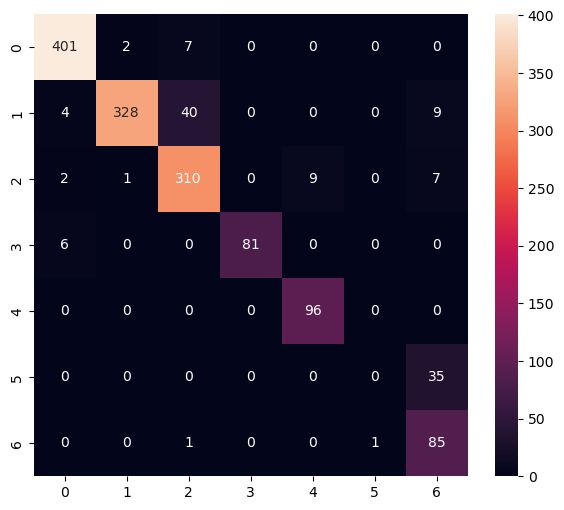

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       410
           1       0.99      0.86      0.92       381
           2       0.87      0.94      0.90       329
           3       1.00      0.93      0.96        87
           4       0.91      1.00      0.96        96
           5       0.00      0.00      0.00        35
           6       0.62      0.98      0.76        87

    accuracy                           0.91      1425
   macro avg       0.77      0.81      0.78      1425
weighted avg       0.91      0.91      0.90      1425



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpnhc7fiun/assets


INFO:tensorflow:Assets written to: /tmp/tmpnhc7fiun/assets


Saved artifact at '/tmp/tmpnhc7fiun'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  139991715087568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139991715089296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139991715088336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139991715091216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139991715091024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139991715091984: TensorSpec(shape=(), dtype=tf.resource, name=None)


2025-04-04 09:13:14.589987: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpnhc7fiun
2025-04-04 09:13:14.590624: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-04 09:13:14.590635: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpnhc7fiun
2025-04-04 09:13:14.633422: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-04 09:13:14.654942: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpnhc7fiun
2025-04-04 09:13:14.661343: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 71358 microseconds.
2025-04-04 09:13:14.671327: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


6688

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 0 ns, sys: 160 μs, total: 160 μs
Wall time: 157 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.4370276e-01 5.2901067e-02 3.3960955e-03 4.9406314e-08 5.6551252e-19
 6.4969413e-15 3.8737209e-14]
0
